In [1]:
# Contours are defined as simply a curve joining all the continuous points(along the boundary) having same color intensity

In [ ]:
# contour are use full for shape detection

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# contour detection require single channel image

In [122]:
def load():
    global img
    original = cv2.imread("data/internal_external.png", 0)
#     original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    img = original.copy()

In [123]:
def imshow(img):
    plt.figure(figsize=(7,7))
    plt.imshow(img, cmap = 'gray')

In [124]:
load()

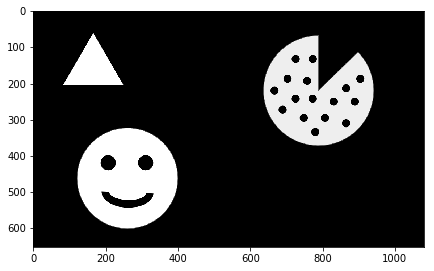

In [125]:
imshow(img)

In [18]:
img.shape

(652, 1080)

In [21]:
# https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#findcontours
# https://www.geeksforgeeks.org/find-and-draw-contours-using-opencv-python/

In [27]:
# CV_RETR_CCOMP - gives all contours inner and outer
# CV_RETR_EXTERNAL- returns only external countours
# it returns contours and hierarchy
contours, heirarchy = cv2.findContours(image=img, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)

In [29]:
len(contours)

22

In [30]:
type(contours)

list

In [40]:
# these 22 contours are all thte possible contours in the image including internal and external contours
# contours are the list of coordinates how to draw the contours

In [32]:
type(heirarchy)

numpy.ndarray

In [33]:
len(heirarchy)

1

In [34]:
len(heirarchy[0])

22

In [28]:
heirarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [133]:
# heirarchy defines where are the countours
# the last column of heirarchy defines whether the contours are internal or external. Here we have 3 unique values -1, 0, 4 as we
# have 3 different contours inner of pie, outer and inner of face

# Plotting contours

In [134]:
contourplotter = np.zeros(img.shape)

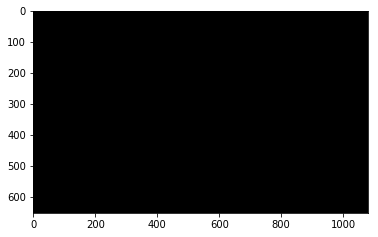

In [135]:
plt.imshow(contourplotter, cmap='gray')

In [136]:
range(len(contours))

range(0, 22)

In [137]:
heirarchy.shape

(1, 22, 4)

In [138]:
len(heirarchy[0])

22

In [139]:
len(heirarchy[0][0])

4

In [140]:
heirarchy[0][0][3]  # selecting last column

-1

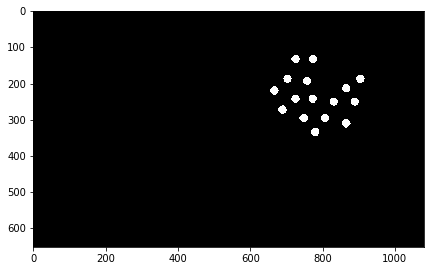

In [152]:
contourplotter = np.zeros(img.shape)

for i in range(len(contours)):
    
    if heirarchy[0][i][3] == 4:
#         contourIdx = contour index
#         color = 255 for white or 0 for black as image is single channel
        cv2.drawContours(contourplotter, contours, i, 255, -1)  # this function modifies the original image
    
imshow(contourplotter)

In [155]:
# 4 = inner contour of pie
# 0 = inner contour of face
# -1 = outer contour

# here the count of zero is 3 in last column of heirarchy which also makes sense as in face we have only 3 countours.
#         1. smile
#         2. two eyes

# so we can say -1 for outer contour and 4+0 is for inner contour